<a href="https://colab.research.google.com/github/Rajput2000/Stage_E/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from fbprophet import Prophet 

In [65]:
df_data = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [66]:
df_data['FullDate'] = pd.to_datetime(df_data['FullDate'])
df_data.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [67]:
df_data.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace = True)

In [68]:
df_data = df_data[['ds', 'y', 'SysLoad', 'Tmax', 'GasPrice']]

In [69]:
df_data.set_index( "ds" , inplace= True) 

In [71]:
df_daily = df_data.resample('D').sum() 

In [72]:
df_daily.head()

,y,SysLoad,Tmax,GasPrice
ds,,,,
2010-09-01,2751.700,41565.380,379.2,88.56
2010-09-02,570.810,38898.990,369.6,88.56
2010-09-03,504.975,41665.760,439.2,106.80
2010-09-04,502.275,35638.085,328.8,81.36
2010-09-05,500.555,35611.410,357.6,106.80


11. Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

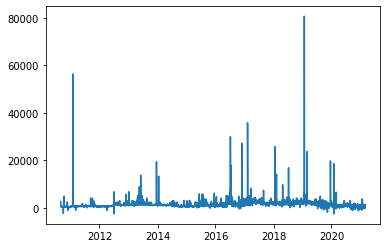

In [73]:
plt.plot(df_daily.index, df_daily.y)

12. Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [75]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df_daily.SysLoad)

print( f'p-value: {round(adf_result[1], 6)}')

p-value: 0.004254


In [106]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df_daily.GasPrice)

print( f'p-value: {round(adf_result[1], 6)}')

p-value: 0.045027


`13. 
Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [107]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df_daily.GasPrice)

print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {round(v, 4)} ' ) 


Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [79]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df_daily.y)

print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {round(v, 4)} ' ) 


Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [80]:
df_train = df_daily.iloc[:2757]
df_test = df_daily.iloc[2757:]

In [82]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [83]:
df_train.dtypes

ds          datetime64[ns]
y                  float64
SysLoad            float64
Tmax               float64
GasPrice           float64
dtype: object

For Questions 14-16

In [84]:
model = Prophet() 
model.fit(df_train[['ds', 'y']]) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
df_test_pred = df_test[['ds']]
forecast = model.predict(df_test_pred)

14. Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

Hint:

Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(df_test.y, forecast.yhat) * 100
round(mape,2)

549.48

15. What is the RMSE in 2 decimal places?

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df_test.y, forecast.yhat))
round(rms,2)

3218.16

16. If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

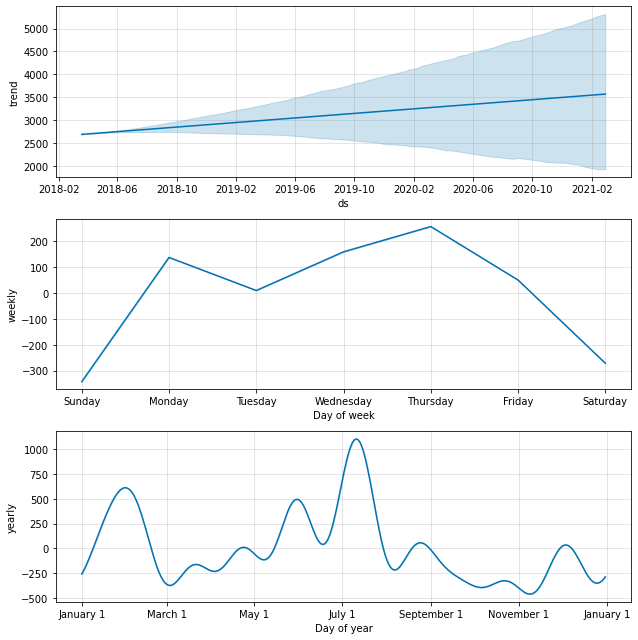

In [91]:
model.plot_components(forecast)
plt.show()

For Questions 17-19

In [92]:
df_train = df_train[['ds', 'SysLoad', 'Tmax', 'GasPrice', 'y']]

In [100]:
model2 = Prophet()
model2.add_regressor('SysLoad')
model2.add_regressor('Tmax')
model2.add_regressor('GasPrice')
model2.fit(df_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
df_test_pred = df_test[['ds', 'SysLoad', 'Tmax', 'GasPrice']]
forecast2 = model2.predict(df_test_pred)

17.Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [97]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(df_test.y, forecast2.yhat) * 100
round(mape,2)

231.28

18. What is the RMSE in 2 decimal places?

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df_test.y, forecast2.yhat))
round(rms,2)

2706.92

19. If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

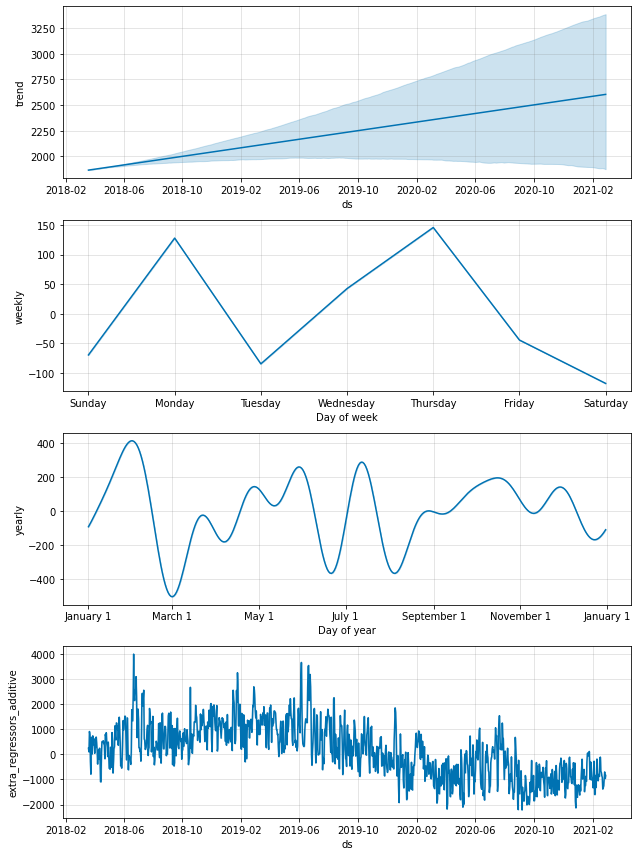

In [99]:
model2.plot_components(forecast2)
plt.show()

20. Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [101]:
df_train = df_train[['ds', 'SysLoad', 'GasPrice', 'y']]

In [102]:
model3 = Prophet()
model3.add_regressor('SysLoad')
model3.add_regressor('GasPrice')
model3.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
df_test_pred = df_test[['ds', 'SysLoad', 'GasPrice']]
forecast3 = model3.predict(df_test_pred)

In [104]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(df_test.y, forecast3.yhat) * 100
round(mape,2)

233.72